# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ida Bagus Rizky Brahmantya
- **Email:** gusderisky957@gmail.com
- **ID Dicoding:** bagus_rizky

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi musim (*season*) dan cuaca (*weathersit*) terhadap jumlah total penyewaan sepeda harian (*cnt*)?
- agaimana perbedaan pola penyewaan antara pelanggan biasa (casual) dan pelanggan terdaftar (registered) berdasarkan hari kerja/libur?

## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [78]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset ini memiliki fitur terkait waktu (seperti `dteday`, `season`, `mnth`, `weekday`, `holiday`, dan `workingday`) yang sangat berguna untuk menjawab pertanyaan bisnis mengenai pola waktu penyewaan.
- Terdapat fitur terkait kondisi lingkungan/cuaca (`weathersit`, `temp`, `atemp`, `hum`, `windspeed`) yang nilainya sudah dinormalisasi.
- Terdapat tiga kolom terkait jumlah penyewaan: `casual` (pengguna belum terdaftar), `registered` (pengguna terdaftar), dan `cnt` (total keseluruhan penyewaan pada hari tersebut).


### Assessing Data

Pada tahap Assessing Data, saya akan memeriksa kondisi data `day_df` secara menyeluruh. Hal ini meliputi pemeriksaan tipe data setiap kolom, pengecekan nilai yang hilang (*missing values*), pengecekan data duplikat, serta melihat ringkasan parameter statistiknya untuk mendeteksi apakah ada keanehan pada nilai data.

In [79]:
#Memeriksa tipe data dan informasi umum dataset
print("Informasi Dataset:")
day_df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
#Memeriksa jumlah missing values (nilai yang hilang)
print("Jumlah Missing Values per Kolom:")
print(day_df.isna().sum())

Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [81]:
#Memeriksa jumlah data duplikat
print("Jumlah Data Duplikat: ", day_df.duplicated().sum())

Jumlah Data Duplikat:  0


In [82]:
#Memeriksa parameter statistik dari data numerik
print("Ringkasan Statistik:")
day_df.describe()

Ringkasan Statistik:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- **Tipe Data:** Hampir semua kolom sudah memiliki tipe data yang sesuai (integer atau float), kecuali kolom `dteday` yang masih berupa *object* (string). Kolom ini harus diubah menjadi *datetime*.
- **Missing Values:** Tidak ada nilai yang hilang (0 *missing values* di semua kolom). Dataset ini sudah sangat bersih dari sananya.
- **Data Duplikat:** Tidak ditemukan adanya baris data yang duplikat (jumlah duplikat = 0).
- **Keanehan Nilai (Outliers/Inaccurate data):** Dari ringkasan statistik `describe()`, nilai minimum dan maksimum untuk setiap kolom (seperti `temp`, `hum`, `windspeed`, `cnt`) tampak masuk akal dan tidak menunjukkan adanya anomali yang ekstrem.

### Cleaning Data

Berdasarkan proses *Assessing Data*, diketahui bahwa dataset tidak memiliki *missing value* ataupun *data duplikat*. Nilai statistiknya juga normal.

Oleh karena itu, pada tahap *Cleaning Data* ini, saya hanya akan melakukan penyesuaian format agar data lebih mudah dipahami dan divisualisasikan:
1. Mengubah tipe data kolom `dteday` dari *object* menjadi *datetime*.
2. Mengganti nama beberapa kolom agar lebih deskriptif (contoh: `dteday` menjadi `date`, `cnt` menjadi `total_rentals`).
3. Mengubah tipe data angka pada kolom kategorikal (`season`, `mnth`, `weathersit`) menjadi label teks yang bermakna (*human-readable*).

In [83]:
#Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#Mengganti nama kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_rentals'
}, inplace=True)

#Mengubah angka menjadi label teks pada kolom kategorikal
#Mapping Musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)

#Mapping Tahun (0: 2011, 1: 2012)
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)

#Mapping Cuaca
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}
day_df['weather_condition'] = day_df['weather_condition'].map(weather_mapping)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,1,2011-01-01,Spring,2011,1,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom `date` sukses diubah menjadi format `datetime64[ns]`.
- Nama-nama kolom sudah diubah menjadi lebih jelas.
- Nilai pada kolom `season`, `year`, dan `weather_condition` sekarang sudah berupa teks (misal: 'Spring', 'Clear/Partly Cloudy'). Hal ini akan sangat mempermudah pembacaan grafik pada tahap EDA dan pembuatan Dashboard nantinya.
- Proses pembersihan data (*Data Cleaning*) telah selesai secara menyeluruh.

## Exploratory Data Analysis (EDA)

### Explore day_df

Pada tahap eksplorasi ini, saya akan menggunakan fungsi agregasi (`groupby`) untuk melihat ringkasan parameter statistik yang akan menjawab kedua pertanyaan bisnis, serta menyiapkan data untuk Analisis Lanjutan.

1. **Eksplorasi Musim dan Cuaca (Pertanyaan 1):** Melihat rata-rata, nilai maksimum, minimum, dan total dari penyewaan sepeda berdasarkan musim (`season`) dan kondisi cuaca (`weather_condition`).
2. **Eksplorasi Tipe Pengguna (Pertanyaan 2):** Membandingkan rata-rata penyewaan pelanggan biasa (`casual`) dan terdaftar (`registered`) pada hari libur vs hari kerja (`workingday`).
3. **Persiapan Analisis Lanjutan (Binning Suhu):** Mengelompokkan suhu numerik (`temp`) menjadi kategori (Dingin, Nyaman, Panas) menggunakan teknik *Binning* (tanpa *Machine Learning*), lalu melihat rata-rata penyewaan di setiap kategori tersebut.

In [84]:
print("=== Rata-rata Penyewaan Berdasarkan Musim ===")
display(day_df.groupby(by="season").agg({
    "total_rentals": ["mean", "max", "min", "sum"]
}).sort_values(by=("total_rentals", "mean"), ascending=False))

print("\n=== Rata-rata Penyewaan Berdasarkan Cuaca ===")
display(day_df.groupby(by="weather_condition").agg({
    "total_rentals": ["mean", "max", "min", "sum"]
}).sort_values(by=("total_rentals", "mean"), ascending=False))

=== Rata-rata Penyewaan Berdasarkan Musim ===


total_rentals                     
                mean   max   min      sum
season                                   
Fall     5644.303191  8714  1115  1061129
Summer   4992.331522  8362   795   918589
Winter   4728.162921  8555    22   841613
Spring   2604.132597  7836   431   471348


=== Rata-rata Penyewaan Berdasarkan Cuaca ===


total_rentals                    
                             mean   max  min      sum
weather_condition                                    
Clear/Partly Cloudy   4876.786177  8714  431  2257952
Misty/Cloudy          4035.862348  8362  605   996858
Light Snow/Rain       1803.285714  4639   22    37869

In [85]:
print("\n=== Perilaku Casual vs Registered (Berdasarkan Hari Kerja) ===")
#Penting workingday 0 = Hari Libur, 1 = Hari Kerja
display(day_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean",
    "total_rentals": "mean"
}))


=== Perilaku Casual vs Registered (Berdasarkan Hari Kerja) ===


,casual,registered,total_rentals
workingday,,,
0,1371.134199,2959.034632,4330.168831
1,606.570000,3978.250000,4584.820000


In [86]:
#Membuat fungsi untuk mengelompokkan suhu (temp)
def categorize_temp(temp):
    if temp < 0.3:
        return 'Dingin'
    elif temp >= 0.3 and temp < 0.7:
        return 'Nyaman'
    else:
        return 'Panas'

#Menerapkan fungsi ke kolom baru bernama 'temp_category'
day_df['temp_category'] = day_df['temp'].apply(categorize_temp)

print("\n=== Pola Penyewaan Berdasarkan Kategori Suhu (Analisis Lanjutan) ===")
display(day_df.groupby(by="temp_category").agg({
    "total_rentals": ["mean", "max", "min", "count"]
}).sort_values(by=("total_rentals", "mean"), ascending=False))


=== Pola Penyewaan Berdasarkan Kategori Suhu (Analisis Lanjutan) ===


total_rentals                  
                       mean   max   min count
temp_category                                
Panas           5655.946154  8173  3285   130
Nyaman          4785.694444  8714    22   468
Dingin          2388.729323  5686   431   133

**Insight dari Eksplorasi Data (EDA):**

1. **Musim & Cuaca:** - Musim Gugur (*Fall*) mencetak rata-rata penyewaan tertinggi, disusul oleh Musim Panas (*Summer*). Musim Semi (*Spring*) memiliki rata-rata paling rendah.
   - Untuk cuaca, pelanggan sangat dominan menyewa sepeda saat cuaca Cerah/Sebagian Berawan (*Clear/Partly Cloudy*). Angka penyewaan turun drastis saat cuaca buruk (*Light Snow/Rain*).
   
2. **Perilaku Pengguna:** - Pelanggan terdaftar (*Registered*) sangat mendominasi penyewaan di hari kerja (*workingday* = 1), menunjukkan penggunaan sepeda untuk rutinitas harian (bekerja/sekolah).
   - Sebaliknya, pelanggan biasa (*Casual*) lebih banyak menyewa saat hari libur (*workingday* = 0), yang mengindikasikan penggunaan untuk rekreasi atau wisata.
   
3. **Analisis Lanjutan (Binning Suhu):** - Melalui *clustering* manual (binning) pada kolom suhu, kita berhasil membuat kolom baru `temp_category`.
   - Dari tabel terlihat jelas bahwa suhu **"Nyaman"** dan **"Panas"** mendatangkan jumlah penyewaan terbanyak. Saat suhu **"Dingin"** (di bawah 0.3), angka penyewaan menurun secara signifikan.

## Visualization & Explanatory Analysis

Pada tahap ini, saya akan membuat visualisasi data untuk menjawab kedua pertanyaan bisnis agar pola dan tren yang ditemukan pada tahap EDA dapat dipahami dengan lebih intuitif.

### Pertanyaan 1: Bagaimana pengaruh kondisi musim (*season*) dan cuaca (*weather_condition*) terhadap jumlah total penyewaan sepeda harian?

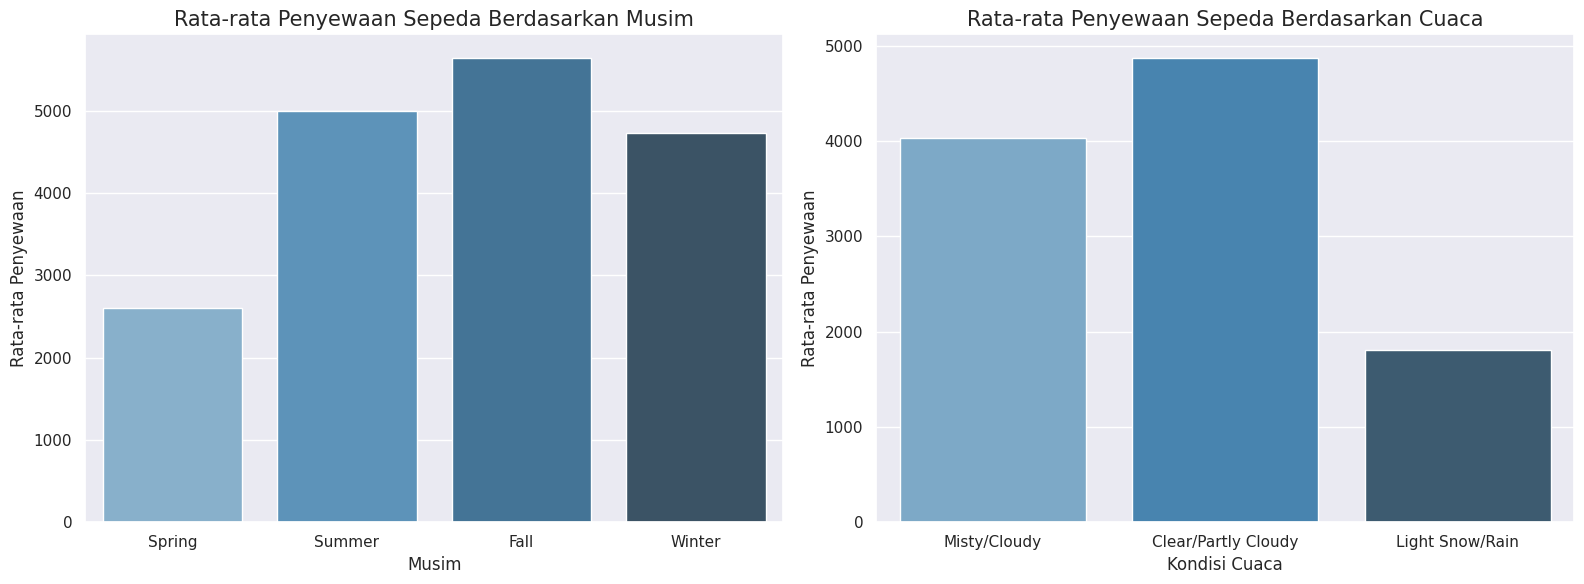

In [87]:
# Mengatur ukuran kanvas visualisasi
plt.figure(figsize=(16, 6))

#Barplot untuk Musim (Season)
plt.subplot(1, 2, 1)
sns.barplot(
    x="season",
    y="total_rentals",
    data=day_df,
    errorbar=None,
    palette="Blues_d",
    hue="season",
    legend=False
)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=15)
plt.ylabel("Rata-rata Penyewaan")
plt.xlabel("Musim")

#Barplot untuk Cuaca (Weather Condition)
plt.subplot(1, 2, 2)
sns.barplot(
    x="weather_condition",
    y="total_rentals",
    data=day_df,
    errorbar=None,
    palette="Blues_d",
    hue="weather_condition",
    legend=False
)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Rata-rata Penyewaan")
plt.xlabel("Kondisi Cuaca")

plt.tight_layout()
plt.show()

**Insight:**
- **Musim (Season):** Grafik batang menunjukkan bahwa **Musim Gugur (Fall)** dan **Musim Panas (Summer)** adalah waktu puncak penyewaan sepeda. Sebaliknya, angka penyewaan berada di titik terendah pada Musim Semi (Spring).
- **Cuaca (Weather Condition):** Minat pengguna untuk bersepeda sangat bergantung pada kondisi cuaca yang bersahabat. Mayoritas penyewaan terjadi saat cuaca **Cerah/Sebagian Berawan (Clear/Partly Cloudy)**, dan grafiknya menurun sangat drastis ketika cuaca mulai memburuk seperti hujan, berkabut, atau bersalju.

### Pertanyaan 2: Bagaimana perbedaan pola penyewaan antara pelanggan biasa (*casual*) dan pelanggan terdaftar (*registered*) berdasarkan hari kerja/libur?

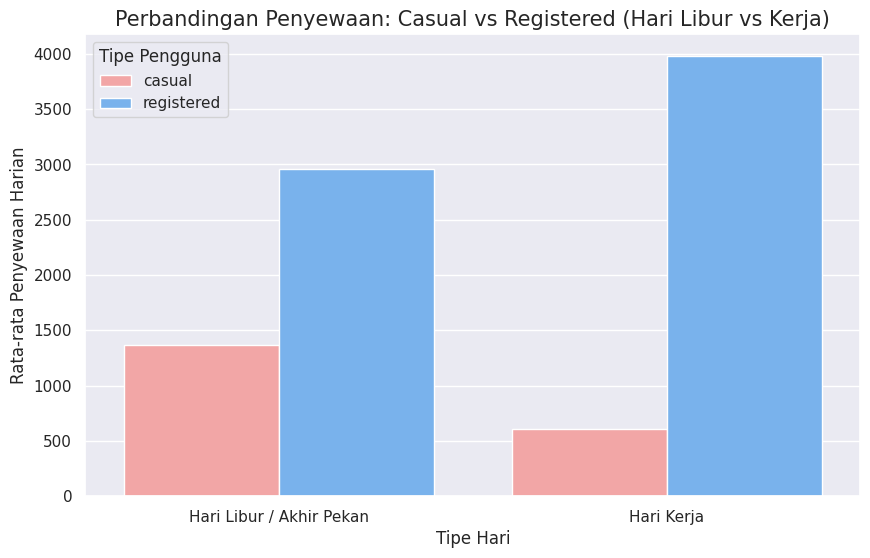

In [ ]:
#Membandingkan casual dan registered
user_behavior = day_df.groupby('workingday')[['casual', 'registered']].mean().reset_index()
user_behavior['workingday'] = user_behavior['workingday'].map({0: 'Hari Libur / Akhir Pekan', 1: 'Hari Kerja'})

#Melakukan melt (unpivot) agar format data sesuai 
user_behavior_melted = user_behavior.melt(id_vars='workingday', var_name='Tipe Pengguna', value_name='Rata-rata Penyewaan')

#Membuat visualisasi Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='workingday',
    y='Rata-rata Penyewaan',
    hue='Tipe Pengguna',
    data=user_behavior_melted,
    palette=["#FF9999", "#66B2FF"]
)

plt.title("Perbandingan Penyewaan: Casual vs Registered (Hari Libur vs Kerja)", fontsize=15)
plt.ylabel("Rata-rata Penyewaan Harian")
plt.xlabel("Tipe Hari")
plt.legend(title="Tipe Pengguna")
plt.show()

**Insight:**
- Pengguna **Registered (Terdaftar)** mencetak angka penyewaan yang sangat tinggi pada **Hari Kerja (Workingday)**. Hal ini mengindikasikan bahwa mereka menjadikan sepeda sebagai moda transportasi harian (misalnya untuk pergi ke kantor atau kampus).
- Sebaliknya, pengguna **Casual (Biasa)** menunjukkan tren yang berlawanan, di mana penyewaan mereka justru meningkat pada **Hari Libur / Akhir Pekan**. Hal ini menunjukkan bahwa kelompok ini lebih sering menyewa sepeda untuk keperluan rekreasi, jalan-jalan, atau olahraga di waktu luang.

## Analisis Lanjutan (Opsional)




**Teknik yang digunakan: Clustering / Binning (Manual Grouping)**

Berdasarkan kolom `temp_category` yang telah dibuat pada tahap EDA, berikut adalah visualisasi rata-rata penyewaan sepeda berdasarkan kategori suhu lingkungan. Ini bertujuan untuk melihat pada suhu seperti apa minat bersepeda paling tinggi.

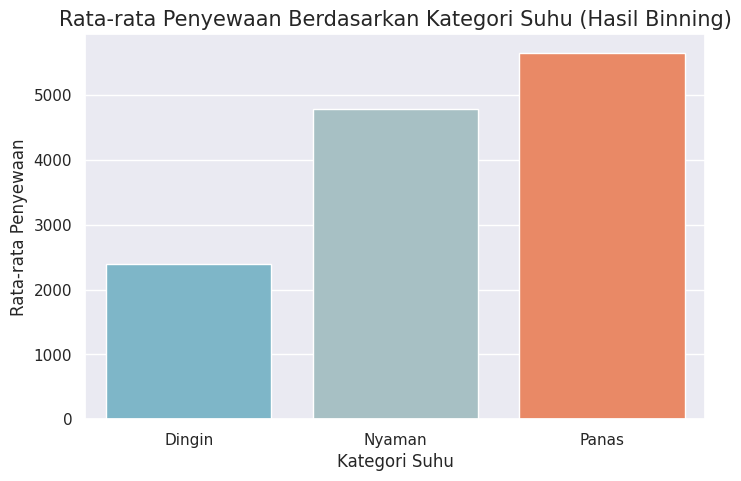

In [89]:
order_temp = ['Dingin', 'Nyaman', 'Panas']

plt.figure(figsize=(8, 5))
sns.barplot(
    x="temp_category",
    y="total_rentals",
    data=day_df,
    order=order_temp,
    hue="temp_category",
    palette=["#A2C4C9", "#72BCD4", "#FF7F50"],
    errorbar=None,
    legend=False
)

plt.title("Rata-rata Penyewaan Berdasarkan Kategori Suhu (Hasil Binning)", fontsize=15)
plt.ylabel("Rata-rata Penyewaan")
plt.xlabel("Kategori Suhu")
plt.show()


**Insight dari Analisis Lanjutan:**
- Berdasarkan hasil analisis menggunakan teknik *binning* pada variabel suhu (`temp`), terbukti bahwa minat masyarakat untuk menyewa sepeda sangat dipengaruhi oleh tingkat kehangatan suhu lingkungan.
- Kategori suhu **"Nyaman"** dan **"Panas"** mendatangkan rata-rata jumlah penyewaan harian yang paling tinggi. Hal ini secara logis menunjukkan bahwa pelanggan lebih termotivasi untuk bersepeda saat cuaca di luar ruangan terasa pas atau hangat.
- Sebaliknya, ketika suhu turun dan masuk ke dalam kategori **"Dingin"**, terjadi penurunan jumlah penyewaan yang sangat signifikan.
- **Dampak Bisnis:** Insight ini sangat *actionable*. Tim operasional dapat menggunakan prakiraan suhu harian untuk memprediksi lonjakan permintaan dan memastikan ketersediaan sepeda di stasiun pada hari yang bersuhu nyaman/panas. Sebaliknya, hari-hari bersuhu dingin dapat dimanfaatkan untuk menarik armada sepeda ke bengkel guna melakukan perawatan rutin (*maintenance*) karena permintaannya sedang sepi.

Conclusion

- **Conclusion Pertanyaan 1:** Berdasarkan hasil analisis, kondisi lingkungan (musim dan cuaca) memiliki pengaruh yang sangat besar terhadap tingkat penyewaan sepeda harian. Penyewaan mencapai titik tertingginya pada **Musim Gugur (Fall)** dan **Musim Panas (Summer)**, sedangkan titik terendahnya terjadi pada Musim Semi (Spring). Dari segi cuaca, mayoritas penyewaan terjadi saat cuaca **Cerah atau Sebagian Berawan (Clear/Partly Cloudy)**. Cuaca yang buruk seperti hujan, salju, atau badai terbukti menurunkan minat penyewaan secara drastis. Hal ini menunjukkan bahwa operasional bisnis sangat bergantung pada kondisi alam yang bersahabat.

- **Conclusion Pertanyaan 2:** Terdapat perbedaan pola perilaku yang sangat jelas antara kedua kelompok pelanggan. Pelanggan **Terdaftar (Registered)** memiliki jumlah penyewaan yang jauh lebih tinggi pada **Hari Kerja (Workingday)** dibandingkan hari libur. Hal ini mengindikasikan bahwa mereka menjadikan sepeda sebagai moda transportasi komuter harian (misalnya untuk pergi ke kantor atau sekolah). Sebaliknya, pelanggan **Biasa (Casual)** justru menunjukkan lonjakan penyewaan pada **Hari Libur atau Akhir Pekan**. Hal ini menunjukkan bahwa kelompok *Casual* lebih banyak menggunakan sepeda untuk tujuan rekreasi, wisata, atau olahraga di waktu luang.

- **Conclusion Analisis Lanjutan (Clustering/Binning Suhu):**
Melalui teknik pengelompokan (*binning*) pada variabel suhu lingkungan, terbukti bahwa pelanggan paling antusias menyewa sepeda saat suhu berada pada kategori **"Nyaman"** dan **"Panas"**. Minat tersebut mengalami penurunan yang sangat signifikan ketika suhu masuk dalam kategori **"Dingin"**. Kesimpulan ini memperkuat temuan pada Pertanyaan 1, di mana musim dengan suhu yang lebih hangat memang lebih diminati oleh pengguna.

In [ ]:
# Menyimpan data yang sudah bersih dan memiliki kolom baru (hasil analisis lanjutan)
day_df.to_csv("main_data.csv", index=False)

print("Data dsiimpan")

Data berhasil disimpan! Silakan cek panel Files di sebelah kiri.
